In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import pickle
#sklearn

In [136]:
# from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import RidgeCV

In [137]:
import warnings
warnings.filterwarnings('ignore')

In [138]:
spotify_data = pd.read_csv("calhacksdata2clean.csv")
spotify_data2 = prep_data(spotify_data)
train, test = train_test_split(spotify_data2)
test.to_csv("test_set.csv")

In [139]:
text_spotify = pd.read_csv("datawsent.csv")

In [140]:
#datacleaning

In [141]:
def prep_data(frame):
    frame_data = frame.drop_duplicates(subset='title', keep = 'first')
    frame_data = frame_data.drop(['year', 'added', 'live', 'pop'], axis = 1)
#     zero_bpm = frame_data[frame_data["bpm"] == 0].index[0]
#     frame_data = frame_data.drop([zero_bpm])
    frame_data["dur"] = frame_data["dur"].astype("float")
    return frame_data
spotify_data2 = prep_data(spotify_data)

In [109]:
def gen_mood(x):
    weights = np.array([10, 1, 1, 0.1, 50, 1])
    features = x.loc[['bpm','nrgy' , 'dnce', 'dB', 'val', 'acous']]
    return sum(features * weights) / (x.loc["dur"])



In [110]:
def normalize(col):
    col_range = max(col) - min(col)
    avg = np.mean(col)
    return (col - avg)/col_range


def prep_features(tbl):
    tbl_norm = tbl
    tbl_norm["bpm"] = normalize(tbl_norm["bpm"])
    tbl_norm["dnce"] = normalize(tbl_norm["dnce"])
    tbl_norm["nrgy"] = normalize(tbl_norm["nrgy"])
    tbl_norm["val"] = normalize(tbl_norm["val"])
    tbl_norm["acous"] = normalize(tbl_norm["acous"])

    tbl_norm["dur"] = tbl_norm["dur"]/100
    return tbl_norm

In [111]:
spotify_data2 = prep_features(text_spotify)

In [112]:
# spotify_data2 = prep_features(spotify_data2)

In [113]:
train, test = train_test_split(spotify_data2)

In [114]:
#running logistic regression to create general moods
#replace with kmeans classifier or other

In [115]:
# min_val = train["val"].sort_values().iloc[0]
# max_val = train["val"].sort_values(ascending=False).iloc[0]
# val_range = max_val - min_val
# bins = val_range/5
# moods = np.arange(min_val, max_val, bins)

# def mood_convert(mood):
#     if mood < moods[0]:
#         return 0
#     if moods[0] <= mood < moods[1]:
#         return 1
#     if moods[1] <= mood < moods[2]:
#         return 2
#     if moods[2] <= mood < moods[3]:
#         return 3
#     if mood >= moods[3]:
#         return 4

# train["mood"] = train["val"].apply(lambda x: mood_convert(x))
# test["mood"] = test["val"].apply(lambda x: mood_convert(x))

# mod = LogisticRegressionCV()
# dropped = train.drop(['title', 'mood'], axis = 1)
# mod.fit(dropped, train["mood"])

In [116]:
# print(mod.score(train.iloc[:, 1:9], train["mood"]))
# print(mod.fit(dropped, train["mood"]))

In [117]:
# result = mod.predict(test.iloc[:, 1:9])
# test["predicted"] = result

In [118]:
#feature development
#Goal: create a continuous variable for mood

In [119]:
def norm_table(tbl):
    tbl_norm = tbl
#     tbl_norm["bpm"] = normalize(tbl_norm["bpm"])
#     tbl_norm["dnce"] = normalize(tbl_norm["dnce"])
#     tbl_norm["dnce"] = normalize(tbl_norm["dnce"])
#     tbl_norm["val"] = normalize(tbl_norm["val"])
#     tbl_norm["acous"] = normalize(tbl_norm["acous"])

#     tbl_norm["dur"] = tbl_norm["dur"]/100
    
    tbl_norm["mood_score"] = tbl_norm.apply(gen_mood, axis = 1)
    tbl_norm["mood_score"] = normalize(tbl_norm["mood_score"])
    in_1_range = 0
    if (v == 0):
        in_1_range = 1 /(np.std(tbl_norm["mood_score"]) * 3)
    else:
        in_1_range = 1 /(np.std(train_norm["mood_score"]) * 3)
    tbl_norm["mood_score"] = tbl_norm["mood_score"] * in_1_range
    return tbl_norm

In [120]:
v = 0
train_norm = norm_table(train)
v = 1
test_norm = test

In [121]:
test

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,Magnitude,Sentiment
1326,4578,St. Tropez,J. Cole,conscious hip hop,2014,-0.213143,0.041281,0.008285,-10,6,-0.142144,2.58,-0.426366,7,62,2.3,-0.2
1315,4566,So Good,B.o.B,dance pop,2012,-0.200564,0.412415,0.116981,-5,22,0.142067,2.13,-0.436366,14,63,3.1,0.3
1528,4263,Ain't No Party,Ibinabo Jack,NaN,2017,0.214530,0.278395,-0.089541,-5,69,0.278909,2.58,0.203634,21,19,0.0,0.0
1618,4139,Just The Way You Are,James Smith,NaN,2018,0.076165,-0.288616,-0.024323,-13,11,-0.215828,1.57,0.433634,5,45,2.0,-0.1
1601,4122,The Walk Of Life,Eucalyptic,NaN,2017,-0.137671,-0.463873,-0.241715,-15,13,-0.394776,1.67,0.503634,4,53,0.0,0.0
870,3264,Individuation,Eluvium,ambient,2016,-0.106225,-0.474183,-0.383019,-26,9,-0.268460,1.89,0.183634,4,54,0.0,0.0
344,1048,They Can't Take That Away From Me,Ella Fitzgerald,adult standards,1956,-0.112514,-0.319543,-0.013454,-15,11,-0.068460,2.80,0.163634,8,53,1.7,0.2
254,271,As If We Never Said Goodbye,Andrew Lloyd Webber,broadway,2018,-0.156539,-0.288616,-0.339541,-11,17,-0.300039,2.77,0.393634,3,23,4.8,0.0
730,1759,Do You Want to Build a Snowman?,Kristen Bell,disney,2013,0.352895,-0.391708,-0.263454,-16,26,-0.300039,2.07,0.373634,6,66,2.7,-0.2
1259,4510,Smoke Break (feat. Future),Chance the Rapper,conscious hip hop,2016,0.044719,-0.051502,0.171329,-8,14,-0.184249,2.26,-0.216366,20,69,5.0,0.1


In [122]:
def find_songs(tbl, score, epsilon):
    in_range = tbl[(score - epsilon < tbl["mood_score"]) &(score + epsilon > tbl["mood_score"])]
    in_range["dists"] = abs(in_range["mood_score"] - score)
    sort_by_dist = in_range.sort_values("dists")
    return sort_by_dist

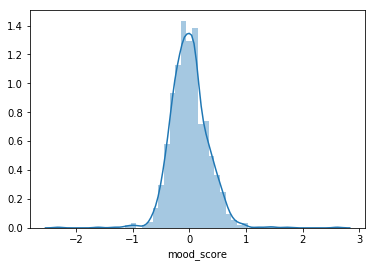

In [123]:
sns.distplot(train_norm["mood_score"])

In [124]:
find_songs(train_norm, 0.2, 0.05)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,Magnitude,Sentiment,mood_score,dists
764,2606,I Try,Macy Gray,neo soul,1999,-0.263457,0.144374,0.040894,-7,8,0.299961,2.39,-0.166366,3,73,5.7,0.0,0.200579,0.000579
554,1307,Want to Want Me,Jason Derulo,dance pop,2015,-0.024464,0.185611,0.247416,-6,11,0.215751,2.08,-0.466366,6,76,3.9,-0.2,0.199119,0.000881
623,1384,Just Dance,Lady Gaga,dance pop,2009,0.006983,0.237158,0.290894,-4,19,0.236803,2.42,-0.446366,3,57,9.2,0.0,0.201154,0.001154
217,233,I‚Äôm Alive (Live),Aaron Tveit,broadway,2013,0.245977,0.288704,-0.263454,-7,92,0.173646,2.24,-0.276366,17,28,5.9,0.1,0.195372,0.004628
321,1018,I'm Coming Out,Diana Ross,adult standards,1980,-0.049621,0.340250,0.193068,-9,8,0.321014,3.23,-0.296366,5,63,5.0,0.3,0.194988,0.005012
1130,4703,Lemme Know,Vince Staples,conscious hip hop,2015,0.239687,0.010353,0.193068,-10,22,0.194698,2.22,-0.466366,6,47,5.1,0.0,0.194342,0.005658
175,187,So Far Away,Jessie Mueller,broadway,2014,0.120191,-0.195832,-0.002584,-7,9,0.099961,1.03,0.313634,3,37,0.0,0.0,0.193223,0.006777
89,92,You Can't Stop The Beat,Elijah Kelley,hollywood,2007,0.327738,0.453652,-0.024323,-5,9,0.257856,3.25,-0.436366,18,54,0.0,0.0,0.207190,0.007190
643,1415,Little of Your Love,HAIM,dance pop,2018,-0.030753,0.216539,0.062633,-9,71,0.236803,2.13,-0.356366,5,34,6.2,0.4,0.208067,0.008067
22,22,"Knowing Me, Knowing You",Jeremy Irvine,hollywood,2018,-0.062199,0.164993,0.138720,-8,6,0.236803,2.25,-0.396366,3,70,0.0,0.0,0.190400,0.009600


In [125]:
find_songs(train_norm, -0.1, 0.5)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,Magnitude,Sentiment,mood_score,dists
690,1599,So What,Miles Davis,bebop,1959,0.113901,-0.360781,-0.035193,-17,12,-0.257933,5.63,0.233634,4,60,0.1,0.1,-0.099975,0.000025
640,1409,Anything,Frank Pole,deep tropical house,2016,0.025851,0.381488,-0.078671,-5,11,-0.131618,2.22,-0.446366,27,41,6.8,-0.3,-0.100399,0.000399
401,1125,Wasn't Born To Follow,Carole King,adult standards,1968,-0.250879,-0.092739,-0.089541,-12,7,-0.036881,2.24,0.193634,2,30,0.9,-0.1,-0.099452,0.000548
772,2618,Lean on Me,Bill Withers,funk,1972,-0.269747,-0.288616,0.073503,-14,12,-0.036881,2.59,0.303634,7,68,3.5,0.0,-0.099298,0.000702
1620,4141,Blues for Sharpie,David Hazeltine,NaN,2012,-0.276036,-0.226760,-0.067802,-17,12,-0.068460,3.30,0.143634,3,44,0.0,0.0,-0.101123,0.001123
1519,4254,"I Want You, Baby",Adam J Bernard,NaN,2017,0.126480,0.020663,-0.296062,-6,11,-0.100039,1.64,0.213634,3,20,0.0,0.0,-0.101267,0.001267
1153,4606,Crack Rock,Frank Ocean,hip hop,2012,-0.181696,0.247467,0.008285,-8,15,-0.078986,2.24,-0.386366,21,59,4.2,-0.2,-0.101807,0.001807
209,225,I Could Be in Love With Someone Like You (Live),Aaron Tveit,broadway,2013,-0.181696,0.154683,-0.143889,-9,76,-0.068460,2.35,-0.326366,19,30,0.0,0.0,-0.097554,0.002446
152,162,Beautiful,Jessie Mueller,broadway,2014,-0.232011,-0.020574,0.008285,-6,17,-0.026354,1.62,0.193634,3,40,0.0,0.0,-0.097262,0.002738
1523,4258,War / What's Going On,Original Broadway Cast-Motown The Musical,NaN,2013,-0.131382,0.154683,-0.133019,-6,21,-0.089512,2.46,-0.336366,14,19,0.0,0.0,-0.097047,0.002953


In [126]:
lm = RidgeCV()

In [127]:
lm.fit(train_norm.loc[:, ["bpm", "nrgy", "dnce", "dB", "val", "dur", "acous"]], train_norm["mood_score"])

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [128]:
test_norm["mood_predicted"] = lm.predict(test_norm.loc[:, ["bpm", "nrgy", "dnce", "dB", "val", "dur", "acous"]])

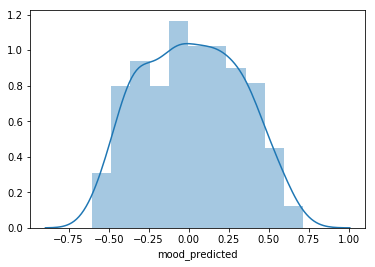

In [129]:
sns.distplot(test_norm["mood_predicted"])

In [130]:
train_norm["mood_score"] = train_norm["mood_score"] * 0.7 + train_norm["Sentiment"] * 0.3

In [131]:
def predict_songs(tbl):
    tbl_predicted = tbl
    predicted = lm.predict(tbl.loc[:, ["bpm", "nrgy", "dnce", "dB", "val", "dur", "acous"]])
    tbl_predicted["mood_predicted"] = predicted
    return tbl_predicted
test_norm = predict_songs(test_norm)

In [132]:
predict_songs(train_norm)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,Magnitude,Sentiment,mood_score,mood_predicted
849,3242,Kitchen,This Will Destroy You,compositional ambient,2017,0.057297,-0.309234,-0.393889,-19,8,-0.436881,3.90,0.453634,3,56,0.100000,0.1,-0.139462,-0.435143
742,2218,You Are Here,Yo La Tengo,alternative rock,2018,-0.018174,0.082518,0.008285,-12,10,-0.363197,3.44,0.293634,3,58,0.100000,0.1,-0.119023,-0.344663
1047,4721,Loca,Vince Staples,conscious hip hop,2015,-0.106225,0.237158,0.345242,-8,7,-0.184249,1.62,-0.466366,7,45,6.000000,-0.1,-0.201716,-0.240590
1579,4099,My World Is Changing,Eroded Sky,NaN,2018,-0.232011,-0.319543,0.019155,-16,12,-0.300039,1.72,0.483634,4,58,0.000000,0.0,-0.312141,-0.384086
1380,4423,High School (Instrumental Version),Instrumental Mafia,NaN,2013,-0.187986,-0.092739,0.236546,-13,26,-0.184249,2.21,-0.396366,13,1,0.000000,0.0,-0.158626,-0.278749
231,248,This Can't Be Love,Judy Kuhn,hollywood,2015,0.076165,-0.309234,0.138720,-15,8,0.089435,1.00,0.053634,14,26,0.000000,0.0,0.075201,0.054294
32,32,A Whole New World,Lea Salonga,hollywood,2004,0.044719,-0.267997,-0.296062,-16,10,-0.310565,1.61,0.353634,4,67,17.200001,0.3,-0.209514,-0.344369
1262,4513,Provider,Frank Ocean,hip hop,2017,0.139058,-0.175214,0.106111,-12,15,-0.068460,2.43,0.263634,28,68,5.800000,0.1,-0.008620,-0.035194
155,165,Act One Finale,James Monroe Iglehart,broadway,2014,0.321448,0.041281,-0.122149,-6,25,0.015751,1.29,0.093634,16,39,2.900000,0.1,0.106689,0.094534
1112,4786,"Slumber (feat. Saba, Sean Deaux & Donnie Trumpet)",Mick Jenkins,conscious hip hop,2015,-0.194275,0.463962,0.008285,-3,21,0.331540,2.16,-0.426366,33,33,2.600000,-0.3,0.111561,0.336563


In [133]:
def find_predicted_songs(tbl, score, num_songs):
    in_range = tbl
    
    in_range["dists"] = abs(in_range["mood_predicted"] - score)
    sort_by_dist = in_range.sort_values("dists")
    
    return sort_by_dist[:num_songs]

In [134]:
find_predicted_songs(test_norm, 0.9000000238418579, 25)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,Magnitude,Sentiment,mood_predicted,dists
1393,4436,Clarinet Marmalade,Porte√±a Jazz Band,NaN,2010,0.547863,0.247467,-0.056932,-9,73,0.521014,1.82,0.483634,43,1,0.0,0.0,0.714975,0.185025
480,1220,Wrap Around Joy,Carole King,adult standards,1968,0.516417,0.175302,-0.133019,-10,42,0.542067,1.79,-0.276366,3,11,3.2,0.5,0.669245,0.230755
1103,4777,The Dualist,The Underachievers,hip hop,2015,0.340316,0.350560,0.127851,-6,8,0.531540,2.69,-0.336366,23,35,5.9,0.0,0.661043,0.238957
562,1315,Happy,Pharrell Williams,dance pop,2013,0.264845,0.268085,0.106111,-7,9,0.531540,2.33,-0.186366,15,74,6.8,0.0,0.639351,0.260649
743,2220,Run Rudolph Run,Chuck Berry,classic rock,1986,0.214530,0.216539,0.149590,-10,7,0.510488,1.66,0.313634,8,58,3.9,0.4,0.611267,0.288733
796,2697,Super Freak,Rick James,disco,2013,0.088744,0.360869,0.312633,-7,6,0.531540,2.07,-0.256366,5,7,4.7,0.5,0.595738,0.304262
904,3342,Django's Tiger,Django Reinhardt,bebop,1996,-0.030753,0.072209,0.203938,-9,11,0.531540,1.58,0.483634,5,41,0.1,0.1,0.588411,0.311589
417,1146,Sweet Georgia Brown,Johnny Mercer,adult standards,1980,0.365474,-0.226760,-0.002584,-11,62,0.478909,1.55,0.413634,7,22,3.6,0.0,0.587890,0.312110
930,3841,I Wish I Could Shimmy Like My Sister Kate,Muggsy Spanier,big band,1997,0.227109,-0.061811,0.149590,-12,32,0.499961,1.76,0.323634,13,34,0.0,0.0,0.582728,0.317272
13,13,Angel Eyes,Christine Baranski,hollywood,2018,0.095033,0.350560,0.171329,-7,9,0.499961,2.51,-0.276366,3,73,0.0,0.0,0.571304,0.328696


In [100]:
#control for epsilon with respet to std, to control # of songs that show up

In [101]:
#update weights with user input

In [102]:
#discrete classification to test generality of algorithm to see ballpark range
#linear regression for more nuanced moods

In [135]:
with open('lm.pickle', 'wb') as f:
    pickle.dump(lm, f)


In [104]:
with open('lm.pickle', 'rb') as fi:
    loaded_obj = pickle.load(fi)

In [ ]:
loaded_obj.predict(test.loc[:, ["bpm", "nrgy", "dnce", "dB", "val", "dur", "acous"]])

In [ ]:
test.sort_values(by='bpm')

In [ ]:
clf2 = pickle.loads(s)
clf2.predict(X[0:1])

In [ ]:
ex = [{"test": 5, "test1": 8}, {"test": 6, "test1": 7}]

In [ ]:
tst = pd.DataFrame()
tst = tst.from_dict(ex)

In [ ]:
new_labels = {"test": "hi", "test1": "hello"}

In [ ]:
tst.rename(columns=new_labels)